# Inicio

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.ticker as ticker

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
submissions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/samples_submissions.csv")
submissions

,attacker_ip_enum,label
0,5,0
1,7,0
2,21,0
3,29,0
4,33,0
...,...,...
49415,199947,0
49416,199949,0
49417,199962,0
49418,199964,0


In [4]:
shodan = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/shodan_df_hashed.csv")
shodan

,shodan_info,attacker_ip_enum
0,{},5915
1,"{'22/tcp': {'headers_hash': None, 'jarm': None...",3325
2,{},8416
3,{},1213
4,{},9185
...,...,...
197674,"{'1701/udp': {'headers_hash': None, 'jarm': No...",196812
197675,{},191141
197676,"{'80/tcp': {'headers_hash': -282574487, 'jarm'...",195077
197677,{},198002


In [5]:
test = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/test.parq")
test

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum
0,2023-07-31 07:17:58+00:00,US,54641.0,IMH-IAD,IN,14061.0,DIGITALOCEAN-ASN,http:spam,1,7696
1,2023-07-31 07:17:58+00:00,US,54641.0,IMH-IAD,IN,14061.0,DIGITALOCEAN-ASN,http:exploit,1,7696
2,2023-07-31 07:17:58+00:00,US,54641.0,IMH-IAD,IN,14061.0,DIGITALOCEAN-ASN,http:bruteforce,1,7696
3,2023-07-31 07:17:58+00:00,US,54641.0,IMH-IAD,IN,14061.0,DIGITALOCEAN-ASN,http:bruteforce,1,7696
4,2023-07-31 07:17:51+00:00,US,396982.0,GOOGLE-CLOUD-PLATFORM,US,53667.0,PONYNET,http:bruteforce,3,7543
...,...,...,...,...,...,...,...,...,...,...
18682292,2023-08-24 21:14:42+00:00,DE,12897.0,ENTEGA Medianet GmbH,DE,3320.0,Deutsche Telekom AG,http:scan,24879,198081
18682293,2023-08-24 21:14:52+00:00,DE,12897.0,ENTEGA Medianet GmbH,DE,3320.0,Deutsche Telekom AG,http:scan,24879,198081
18682294,2023-08-24 21:14:42+00:00,DE,12897.0,ENTEGA Medianet GmbH,DE,3320.0,Deutsche Telekom AG,http:scan,24879,198081
18682295,2023-08-24 21:14:42+00:00,DE,12897.0,ENTEGA Medianet GmbH,DE,3320.0,Deutsche Telekom AG,http:scan,24879,198081


In [6]:
columnas = ["attack_time", "attacker_country", "attack_type", "label"]
train = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/train.parq", columns = columnas)
train

,attack_time,attacker_country,attack_type,label
0,2023-07-31 07:17:51+00:00,TR,http:exploit,0
1,2023-07-31 07:17:51+00:00,TR,http:spam,0
2,2023-07-31 07:17:49+00:00,DE,http:bruteforce,0
3,2023-07-31 07:17:49+00:00,DE,http:spam,0
4,2023-07-31 07:17:49+00:00,DE,http:exploit,0
...,...,...,...,...
61629680,2023-08-24 21:14:52+00:00,DE,http:scan,0
61629681,2023-08-24 21:14:46+00:00,US,http:scan,0
61629682,2023-08-24 21:14:46+00:00,US,http:spam,0
61629683,2023-08-24 21:14:46+00:00,US,http:spam,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61629685 entries, 0 to 61629684
Data columns (total 4 columns):
 #   Column            Dtype              
---  ------            -----              
 0   attack_time       datetime64[ns, UTC]
 1   attacker_country  category           
 2   attack_type       category           
 3   label             int8               
dtypes: category(2), datetime64[ns, UTC](1), int8(1)
memory usage: 705.3 MB


In [8]:
train["attacker_country"].nunique()

214

In [9]:
train["attack_type"].nunique()

15

In [10]:
train.groupby("attacker_country")["attack_time"].mean().reset_index()

,attacker_country,attack_time
0,AD,2023-08-11 18:34:52.768099072+00:00
1,AE,2023-08-12 09:35:23.694358784+00:00
2,AF,2023-08-13 12:44:15.874930176+00:00
3,AG,2023-08-11 23:11:19.881401856+00:00
4,AI,2023-08-02 11:32:26.293333504+00:00
...,...,...
209,XK,2023-08-12 23:47:40.063609856+00:00
210,YE,2023-08-18 10:30:59.121640960+00:00
211,ZA,2023-08-15 04:41:40.079550208+00:00
212,ZM,2023-08-14 20:52:12.916988928+00:00


In [11]:
train.groupby("label").size().reset_index(name = "count")

,label,count
0,0,60594448
1,1,1035237


# Plot 2D con Distribución Marginal

In [12]:
train[["protocol", "attack"]] = train[train["label"] == 1]["attack_type"].str.split(":", expand = True)

In [13]:
train[train["label"] == 1].groupby(["protocol", "attack"]).size().reset_index(name = "count")

,protocol,attack,count
0,http,bruteforce,66423
1,http,crawl,5110
2,http,exploit,307426
3,http,scan,235753
4,http,spam,317680
5,pop3/imap,bruteforce,10294
6,sip,bruteforce,2
7,ssh,bruteforce,87084
8,tcp,scan,72
9,telnet,bruteforce,19


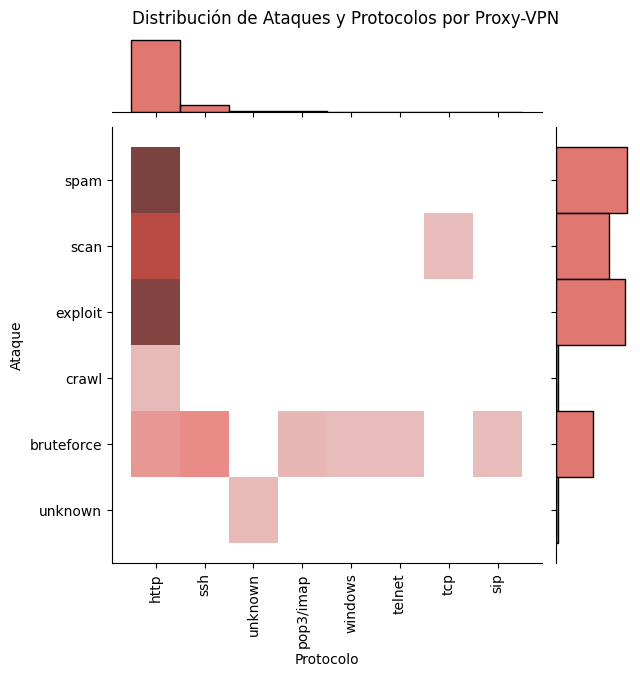

In [14]:
protocolos = train[train["label"] == 1]["protocol"].unique()

fig = sns.jointplot(x = train[train["label"] == 1]["protocol"], y = train[train["label"] == 1]["attack"], kind = "hist", color = "#d64a40")
fig.ax_joint.set_xticks(range(len(protocolos)))
fig.ax_joint.set_xticklabels(protocolos, rotation = 90)
fig.fig.suptitle("Distribución de Ataques y Protocolos por Proxy-VPN", y = 1.02)
fig.set_axis_labels("Protocolo", "Ataque")

# Stacked Bar Plot

In [15]:
train[train["label"] == 1]["attack_type"].value_counts().reset_index(name = "count").head(5)

,index,count
0,http:spam,317680
1,http:exploit,307426
2,http:scan,235753
3,ssh:bruteforce,87084
4,http:bruteforce,66423


In [16]:
stackedbarplot_ataques = train.groupby(["attack_type", "label"]).size().unstack().reset_index()
stackedbarplot_ataques["percentage_0"] = (stackedbarplot_ataques[0] / (stackedbarplot_ataques[0] + stackedbarplot_ataques[1])) * 100
stackedbarplot_ataques["percentage_1"] = (stackedbarplot_ataques[1] / (stackedbarplot_ataques[0] + stackedbarplot_ataques[1])) * 100
stackedbarplot_ataques

label,attack_type,0,1,percentage_0,percentage_1
0,database:bruteforce,453,0,100.000000,0.000000
1,ftp:bruteforce,1477,0,100.000000,0.000000
2,http:bruteforce,5027072,66423,98.695925,1.304075
3,http:crawl,89867,5110,94.619750,5.380250
4,http:exploit,15000414,307426,97.991709,2.008291
5,http:scan,16414285,235753,98.584069,1.415931
6,http:spam,16983472,317680,98.163822,1.836178
7,pop3/imap:bruteforce,430021,10294,97.662128,2.337872
8,sip:bruteforce,224954,2,99.999111,0.000889
9,smb:bruteforce,12437,0,100.000000,0.000000


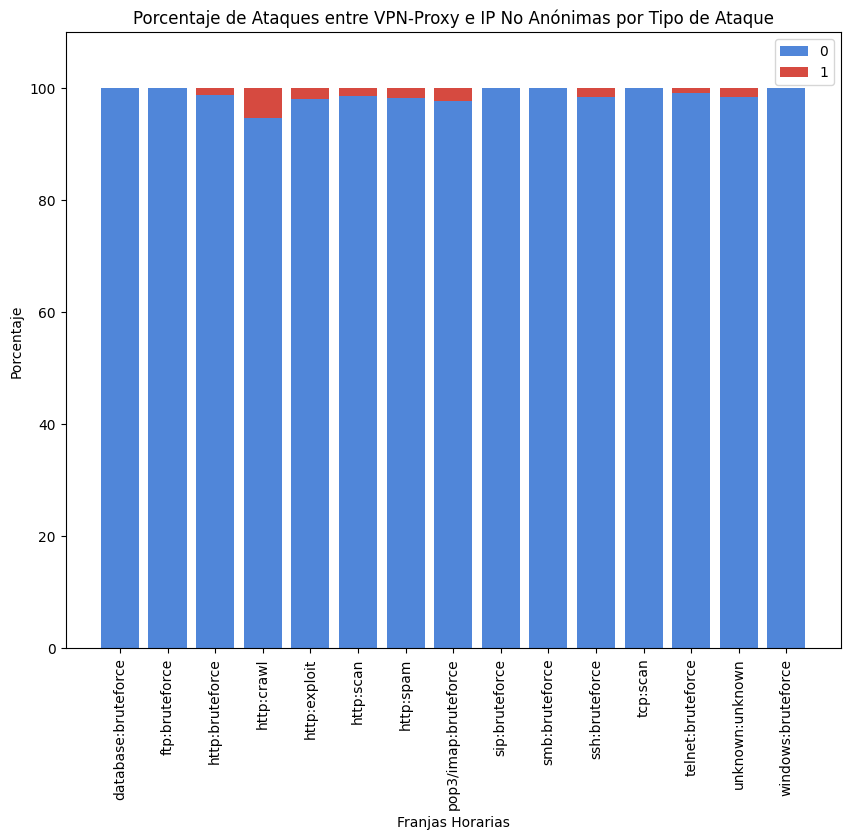

In [17]:
plt.figure(figsize = (10, 8))
plt.bar(stackedbarplot_ataques["attack_type"], stackedbarplot_ataques["percentage_0"], label = "0", color = "#5086d9")
plt.bar(stackedbarplot_ataques["attack_type"], stackedbarplot_ataques["percentage_1"], bottom = stackedbarplot_ataques["percentage_0"], label = "1", color = "#d64a40")

plt.title("Porcentaje de Ataques entre VPN-Proxy e IP No Anónimas por Tipo de Ataque")
plt.xlabel("Franjas Horarias")
plt.ylabel("Porcentaje")
plt.xticks(rotation = 90)
plt.legend()
plt.ylim(0, 110)

plt.show()

In [18]:
train["hour"] = train["attack_time"].dt.hour
train["hour_range"] = pd.cut(train["hour"], bins = [-1, 6, 12, 18, 23], labels = ["(0-6)","(6-12)", "(12-18)", "(18-0)"])
train

,attack_time,attacker_country,attack_type,label,protocol,attack,hour,hour_range
0,2023-07-31 07:17:51+00:00,TR,http:exploit,0,NaN,NaN,7,(6-12)
1,2023-07-31 07:17:51+00:00,TR,http:spam,0,NaN,NaN,7,(6-12)
2,2023-07-31 07:17:49+00:00,DE,http:bruteforce,0,NaN,NaN,7,(6-12)
3,2023-07-31 07:17:49+00:00,DE,http:spam,0,NaN,NaN,7,(6-12)
4,2023-07-31 07:17:49+00:00,DE,http:exploit,0,NaN,NaN,7,(6-12)
...,...,...,...,...,...,...,...,...
61629680,2023-08-24 21:14:52+00:00,DE,http:scan,0,NaN,NaN,21,(18-0)
61629681,2023-08-24 21:14:46+00:00,US,http:scan,0,NaN,NaN,21,(18-0)
61629682,2023-08-24 21:14:46+00:00,US,http:spam,0,NaN,NaN,21,(18-0)
61629683,2023-08-24 21:14:46+00:00,US,http:spam,0,NaN,NaN,21,(18-0)


In [19]:
stackedbarplot_horas = train.groupby(["hour_range", "label"]).size().unstack().reset_index()
stackedbarplot_horas["percentage_0"] = (stackedbarplot_horas[0] / (stackedbarplot_horas[0] + stackedbarplot_horas[1])) * 100
stackedbarplot_horas["percentage_1"] = (stackedbarplot_horas[1] / (stackedbarplot_horas[0] + stackedbarplot_horas[1])) * 100
stackedbarplot_horas

label,hour_range,0,1,percentage_0,percentage_1
0,(0-6),17885879,295118,98.376778,1.623222
1,(6-12),16394935,295316,98.230608,1.769392
2,(12-18),14536303,235678,98.404561,1.595439
3,(18-0),11777331,209125,98.255323,1.744677


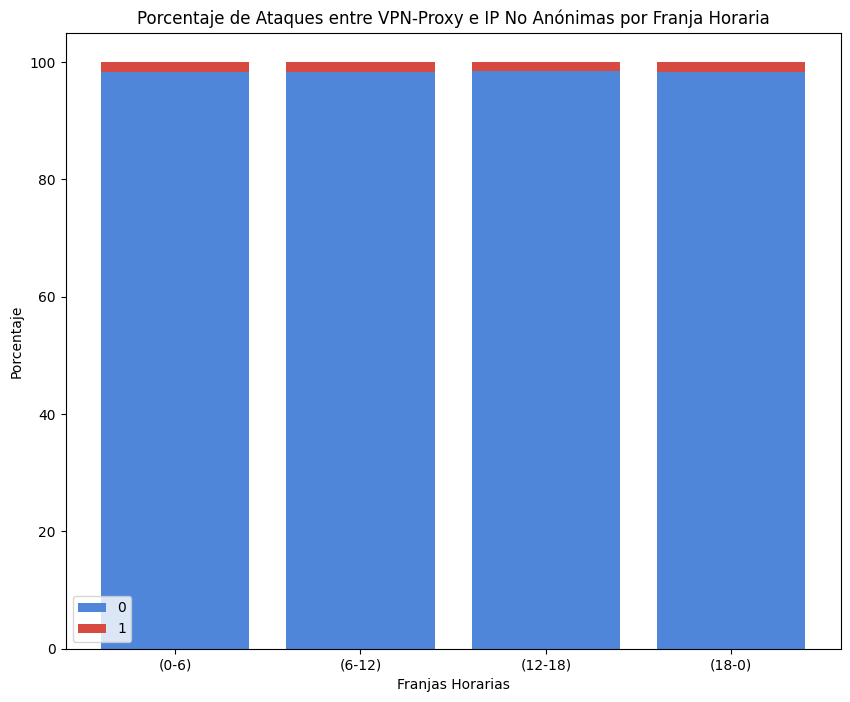

In [20]:
plt.figure(figsize = (10, 8))
plt.bar(stackedbarplot_horas["hour_range"], stackedbarplot_horas["percentage_0"], label = "0", color = "#5086d9")
plt.bar(stackedbarplot_horas["hour_range"], stackedbarplot_horas["percentage_1"], bottom = stackedbarplot_horas["percentage_0"], label = "1", color = "#d64a40")

plt.title("Porcentaje de Ataques entre VPN-Proxy e IP No Anónimas por Franja Horaria")
plt.xlabel("Franjas Horarias")
plt.ylabel("Porcentaje")
plt.legend()

plt.show()

# Histograma

In [21]:
train.loc[train["label"] == 1]

,attack_time,attacker_country,attack_type,label,protocol,attack,hour,hour_range
83,2023-07-31 07:19:02+00:00,RU,http:spam,1,http,spam,7,(6-12)
84,2023-07-31 07:19:02+00:00,RU,http:scan,1,http,scan,7,(6-12)
1522,2023-08-01 07:05:59+00:00,US,http:spam,1,http,spam,7,(6-12)
1523,2023-08-01 07:05:59+00:00,US,http:scan,1,http,scan,7,(6-12)
2581,2023-08-01 09:51:29+00:00,US,http:scan,1,http,scan,9,(6-12)
...,...,...,...,...,...,...,...,...
61629386,2023-08-24 21:09:44+00:00,US,http:exploit,1,http,exploit,21,(18-0)
61629389,2023-08-24 21:09:44+00:00,SG,http:scan,1,http,scan,21,(18-0)
61629390,2023-08-24 21:09:44+00:00,SG,http:spam,1,http,spam,21,(18-0)
61629391,2023-08-24 21:09:44+00:00,SG,http:scan,1,http,scan,21,(18-0)


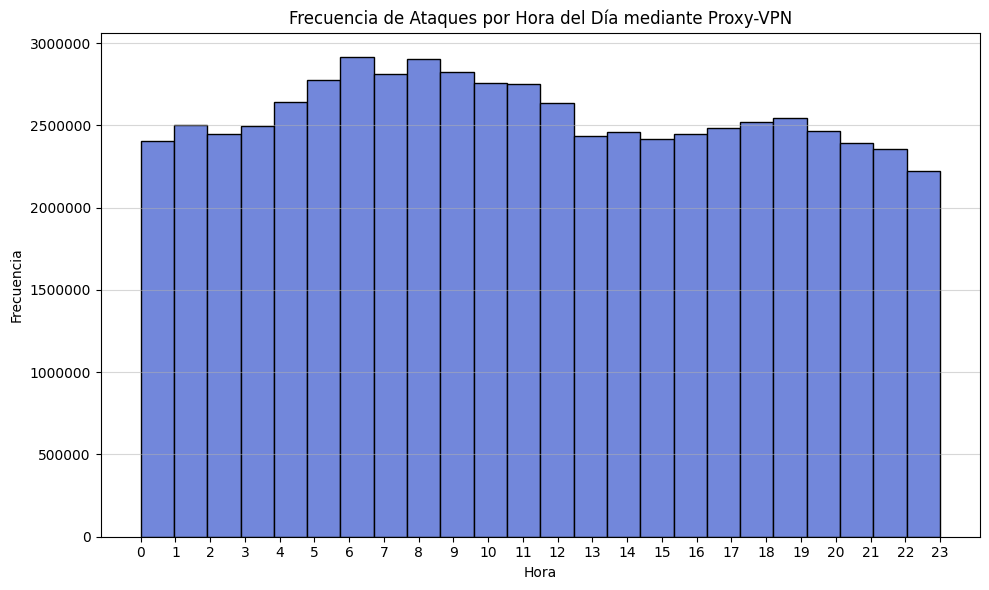

In [22]:
plt.figure(figsize = (10, 6))
plt.hist(train["hour"], bins = 24, edgecolor = "black", color = "#7287db")
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Ataques por Hora del Día mediante Proxy-VPN")
plt.xticks(range(24))
plt.grid(axis = "y", alpha = 0.5)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

plt.tight_layout()
plt.show()

# Heatmap

In [23]:
ataques = ["http:spam", "http:exploit", "http:scan", "ssh:bruteforce", "http:bruteforce"]
paises = ["US", "CA", "RU", "SG", "DE", "AU", "CN", "IN", "FR", "NL"]

train["attack_type"] = np.where(train["attack_type"].isin(ataques), train["attack_type"], "Otros ataques")
train["attacker_country"] = np.where(train["attacker_country"].isin(paises), train["attacker_country"], "Otros países")

train_ataques = train[train["label"] == 1][["attack_type", "attacker_country"]].value_counts().reset_index(name = "count")
train_ataques

,attack_type,attacker_country,count
0,http:spam,US,115839
1,http:scan,US,102279
2,http:exploit,US,83424
3,http:exploit,CA,59282
4,http:exploit,SG,54264
...,...,...,...
61,ssh:bruteforce,RU,18
62,ssh:bruteforce,NL,14
63,Otros ataques,AU,11
64,http:bruteforce,AU,3


In [24]:
total_ataques = train_ataques.groupby("attacker_country")["count"].sum().reset_index(name = "total")
train_ataques = pd.merge(train_ataques, total_ataques)
train_ataques["probability"] = (train_ataques["count"] / train_ataques["total"])
train_ataques

,attack_type,attacker_country,count,total,probability
0,http:spam,US,115839,330943,0.350027
1,http:scan,US,102279,330943,0.309053
2,http:exploit,US,83424,330943,0.252080
3,http:bruteforce,US,22265,330943,0.067277
4,Otros ataques,US,5069,330943,0.015317
...,...,...,...,...,...
61,http:spam,NL,4701,15999,0.293831
62,http:scan,NL,3709,15999,0.231827
63,http:bruteforce,NL,1094,15999,0.068379
64,Otros ataques,NL,973,15999,0.060816


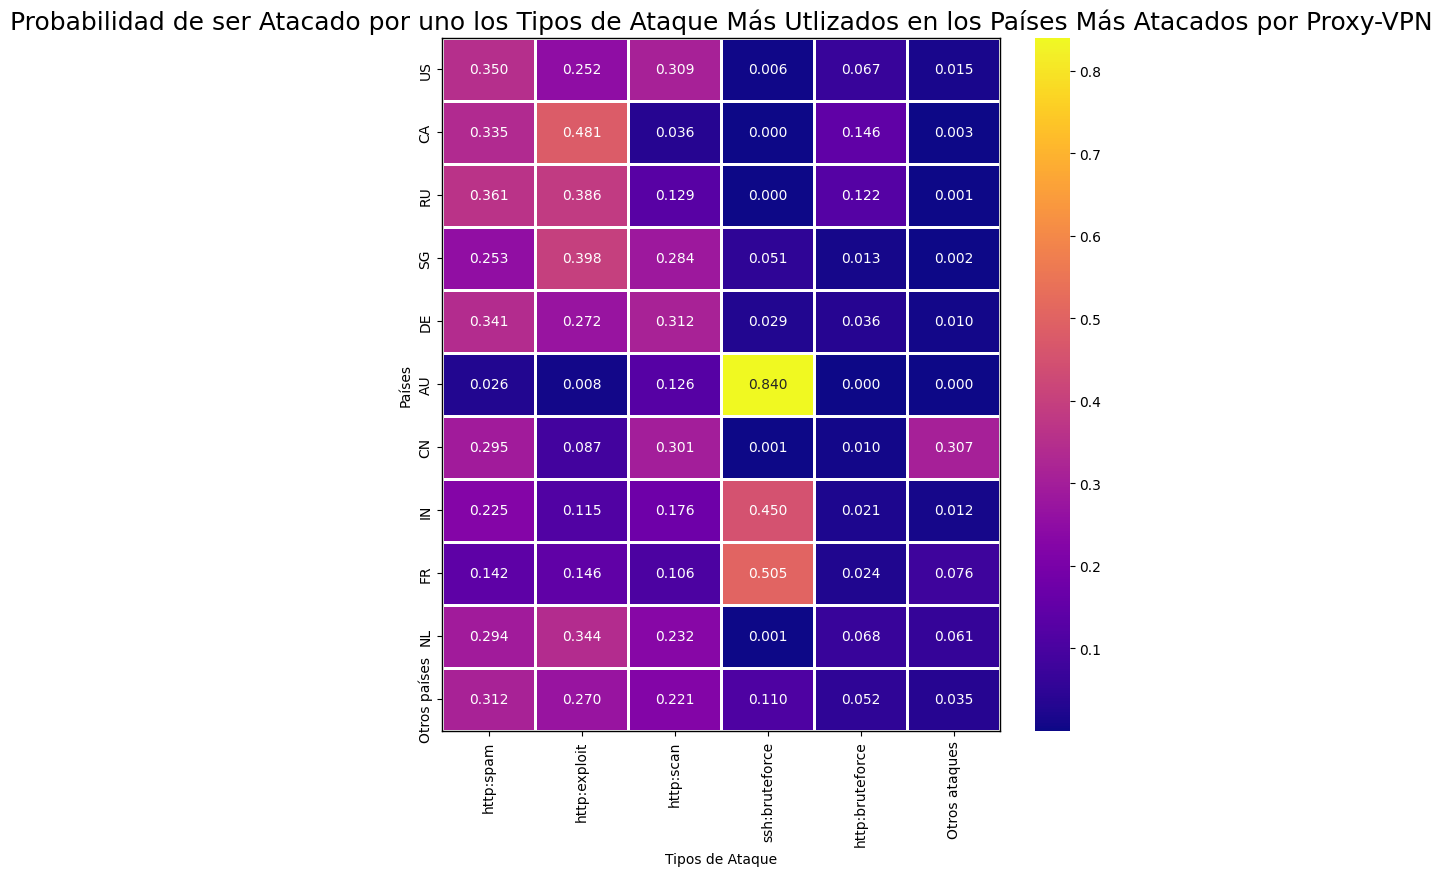

In [25]:
heatmap_ataques = train_ataques.pivot_table(index = "attacker_country", columns = "attack_type", values = "probability")
ataques = ["http:spam", "http:exploit", "http:scan", "ssh:bruteforce", "http:bruteforce", "Otros ataques"]
paises = ["US", "CA", "RU", "SG", "DE", "AU", "CN", "IN", "FR", "NL", "Otros países"]
heatmap_ataques = heatmap_ataques.reindex(index = paises, columns = ataques)

plt.figure(figsize = (9, 9))
sns.heatmap(heatmap_ataques, cmap = "plasma", annot = True, fmt = ".3f", linewidths = 0.8,  xticklabels = ataques, yticklabels = paises)
ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1)
plt.title("Probabilidad de ser Atacado por uno los Tipos de Ataque Más Utlizados en los Países Más Atacados por Proxy-VPN", fontsize = 18)
plt.xlabel("Tipos de Ataque")
plt.ylabel("Países")
ax.set_facecolor("#dbdbdb")

plt.show()

# Bar Plot

In [26]:
dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

train["day"] = train[train["label"] == 1]["attack_time"].dt.day_name()
train_dias = train["day"].value_counts().reset_index(name = "count")
train_dias = train_dias.set_index("index").reindex(dias).reset_index()

train_dias

,index,count
0,Monday,178481
1,Tuesday,164948
2,Wednesday,126390
3,Thursday,131497
4,Friday,129118
5,Saturday,145894
6,Sunday,158909


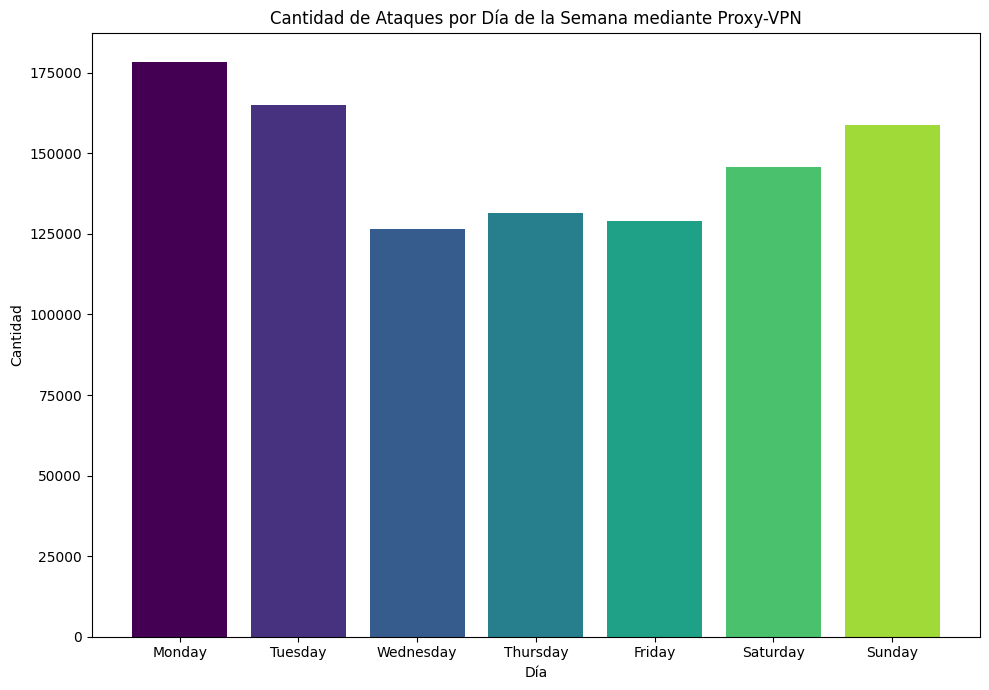

In [27]:
colores = ["#440154", "#46327e", "#365c8d", "#277f8e", "#1fa187", "#4ac16d", "#a0da39"]

plt.figure(figsize=(10, 7))
plt.bar(train_dias["index"], train_dias["count"], color = colores)
plt.title("Cantidad de Ataques por Día de la Semana mediante Proxy-VPN")
plt.xlabel("Día")
plt.ylabel("Cantidad")
plt.tight_layout()

plt.show()